In [1]:
%matplotlib notebook

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.animation as ani

# Game of Life

I made this version after a coding test (thanks Phil!). I was not proud of what I did there and the thing stuck in my mind. On the day after, when I was walking in the city, I recalled we can calculate the neighbors of a cell using a [convolution matrix](https://en.wikipedia.org/wiki/Kernel_%28image_processing%29#Convolution). So I sat on the computer and I got this :)

Here are all the simplifications I made:

1. Neighbors are calculated using a convolution matrix. It's easy and it deals with the borders of the board by itself.
2. Life rules now uses "vectorize". It avoids explicit loops and it makes rules easier to test.
3. Game steps as a generator. It's easy to test and can be plugged anywhere.

The core code has now less than 20 lines, has tests, a simple visualization and I'm happy! \o/

In [2]:
NEIGHBORS_SUM = np.array([[1, 1, 1],
                          [1, 0, 1],
                          [1, 1, 1]])

@np.vectorize
def apply_life_rules(board, neighbors):
    if neighbors == 2: return board
    if neighbors == 3: return 1
    return 0

def neighbors(board):
    return convolve2d(board, NEIGHBORS_SUM, mode='same')

def life_step(board):
    return apply_life_rules(board, neighbors(board))
        
def game_of_life(starting_board):
    current = np.array(starting_board)
    while True:
        yield current
        current = life_step(current)

# Testing

Simple tests, no framework.

In [3]:
def test_apply_life_rules():
    assert 0 == apply_life_rules(0, 0)
    assert 0 == apply_life_rules(0, 1)
    assert 0 == apply_life_rules(0, 2)
    assert 1 == apply_life_rules(0, 3)
    assert 0 == apply_life_rules(0, 4)

    assert 0 == apply_life_rules(1, 0)
    assert 0 == apply_life_rules(1, 1)
    assert 1 == apply_life_rules(1, 2)
    assert 1 == apply_life_rules(1, 3)
    assert 0 == apply_life_rules(1, 4)
    
    assert np.all([[0, 0, 0], [1, 1, 0], [1, 1, 0]] == apply_life_rules([[0, 0, 0], [1, 1, 0], [1, 1, 0]],
                                                                        [[2, 2, 1], [3, 3, 2], [3, 3, 2]]))
    
def test_neighbors():
    assert np.all([[0, 0, 0], [0, 0, 0], [0, 0, 0]] == neighbors([[0, 0, 0], [0, 0, 0], [0, 0, 0]]))
    assert np.all([[1, 1, 1], [1, 0, 1], [1, 1, 1]] == neighbors([[0, 0, 0], [0, 1, 0], [0, 0, 0]]))
    assert np.all([[3, 5, 3], [5, 8, 5], [3, 5, 3]] == neighbors([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))
    assert np.all([[2, 2, 1], [3, 3, 2], [3, 3, 2]] == neighbors([[0, 0, 0], [1, 1, 0], [1, 1, 0]]))
    
def test_game_of_life():
    # http://conwaylife.com/wiki/Block
    board_stable = [[0, 0, 0], [1, 1, 0], [1, 1, 0]]
    step = game_of_life(board_stable)
    assert np.all(board_stable == next(step))
    assert np.all(board_stable == next(step))
    assert np.all(board_stable == next(step))

    # http://conwaylife.com/w/index.php?title=Blinker
    board_blinker1 = [[0, 0, 0], [1, 1, 1], [0, 0, 0]]
    board_blinker2 = [[0, 1, 0], [0, 1, 0], [0, 1, 0]]
    step = game_of_life(board_blinker1)
    assert np.all(board_blinker1 == next(step))
    assert np.all(board_blinker2 == next(step))
    assert np.all(board_blinker1 == next(step))
    assert np.all(board_blinker2 == next(step))


    
test_apply_life_rules()
test_neighbors()
test_game_of_life()
print('No errors!')

No errors!


# Running the game

Game running. I spend some time to understand animations in Jupyter to make this pretty as it deserves.

<IPython.core.display.Javascript object>


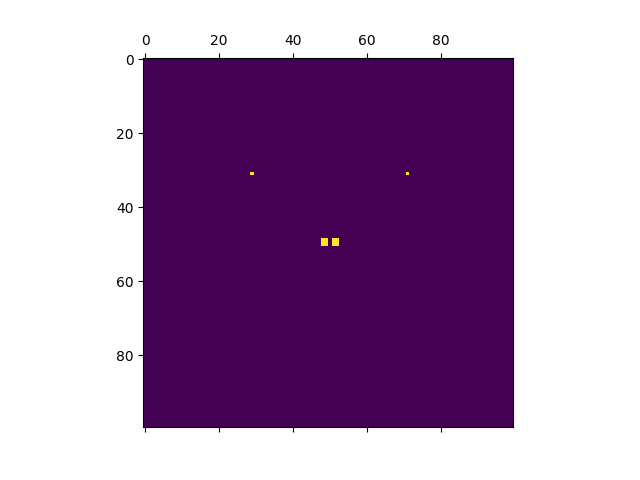

In [7]:
board = np.zeros((100, 100))

#http://www.conwaylife.com/w/index.php?title=Glider
board[1:4, 1:4] = [[0, 1, 0],
                   [0, 0, 1],
                   [1, 1, 1]]

board[1:4, 97:100] = [[0, 1, 0],
                      [1, 0, 0],
                      [1, 1, 1]]

fig, chart = plt.subplots()
view = chart.matshow(board)

def animate(board):
    view.set_data(board)

animation = ani.FuncAnimation(fig, animate, frames=game_of_life(board))
plt.show()